CLASSIFICATION PROBLEM => FINDING THE PERSON CAN HAVE HEART FAILURE OR NOT

#1. importing the libraries

In [ ]:
!pip install matplotlib

In [9]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#2.importing the dataset

In [10]:

dataset = pd.read_csv('heart.csv')
X = dataset.iloc[:,:-1].values    #iloc is used to get the values of rows and columns too
Y = dataset.iloc[:,-1].values    #-1 is the last index

In [11]:
dataset
# print(X)
# print(Y)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


#3.PREPROCESSING PHASE
because there are many of the string values  as machine learning algos compute numerical data

In [12]:
from sklearn.preprocessing import LabelEncoder   #labelencoding is used for oridinal data ranked data not for nominal data but it can be used for both
# here is the data is in nominal form
# label encoding object
le1 = LabelEncoder()
le2 = LabelEncoder()
le6 = LabelEncoder()
le8 = LabelEncoder()
le10 = LabelEncoder()

#  converting the columns containing the string data into numerical data
X[:,1] =le1.fit_transform(X[:,1])   #X[:,1] -> going through all rows of column 1
X[:,2] =le2.fit_transform(X[:,2])
X[:,6] =le6.fit_transform(X[:,6])
X[:,8] =le8.fit_transform(X[:,8])
X[:,10] =le10.fit_transform(X[:,10])

In [13]:
print(X)


[[40 1 1 ... 0 0.0 2]
 [49 0 2 ... 0 1.0 1]
 [37 1 1 ... 0 0.0 2]
 ...
 [57 1 0 ... 1 1.2 1]
 [57 0 1 ... 0 0.0 1]
 [38 1 2 ... 0 0.0 2]]


In [14]:
xpd = pd.DataFrame(X)
xpd

,0,1,2,3,4,5,6,7,8,9,10
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


#4.spliting the dataset into training 80% and test 20% set


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [16]:
print("training set",X_train.shape,Y_train.shape ,"test set",X_test.shape,Y_test.shape)
print("original set",X.shape,Y.shape)

training set (734, 11) (734,) test set (184, 11) (184,)
original set (918, 11) (918,)


#5.feature scaling
feature scaling -> there is large variation in the values of dataset so we apply feature scaling for normalising the data in the same range so that it can be visualize easily and it make the calculation for the machine learning model easy

normalizing the data of the dataset - so that mean = 0 and standard deviation =1

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()    #standardscaler object
# applying the feature scaling technique on the training and testing dataset
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [18]:
print(X_train)

[[ 1.75354017  0.51740017 -0.82686398 ...  1.19939076  1.0553738
  -0.59357258]
 [-0.81787111  0.51740017 -0.82686398 ...  1.19939076  0.57784676
  -0.59357258]
 [ 1.21782949 -1.93273999  1.27683849 ... -0.83375663 -0.0906911
   1.0443307 ]
 ...
 [ 0.3606924  -1.93273999 -0.82686398 ... -0.83375663 -0.85473437
   1.0443307 ]
 [ 1.11068735  0.51740017 -0.82686398 ...  1.19939076  2.96548197
  -2.23147586]
 [-0.71072897  0.51740017  1.27683849 ... -0.83375663 -0.85473437
   1.0443307 ]]


In [19]:
print(X_train[:,0].std())

1.0


#6. Training Dataset

# 1.Logistic Regression

In [20]:

from sklearn.linear_model import LogisticRegression
model_logistic  = LogisticRegression()
model_logistic.fit(X_train , Y_train)   # fit(independent variables,dependent variables)


LogisticRegression()

In [21]:
# prediction
y_prediction_logistic = model_logistic.predict(X_test)
print(y_prediction_logistic)


#  COMPARISION BETWEEN Y_PREDICTION_logistic VALUE OR Y_TEST VALUE WHERE THE PREDICTION IS TRUE OR FALSE OR LIKE CORRECT OR NOT
data = {'y_prediction_logistic': y_prediction_logistic , 'Y_test': Y_test}
df = pd.DataFrame(data)

# lets compare the prediction with the y_test
df['compare'] = df['y_prediction_logistic']== df['Y_test']
print(df['compare'])

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1
 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1]
0       True
1      False
2       True
3       True
4       True
       ...  
179     True
180     True
181    False
182     True
183     True
Name: compare, Length: 184, dtype: bool


In [22]:
# testing accuracy of logistic regression in %
from sklearn.metrics import accuracy_score
              # accuracy_score(original value , predicted values )

logistic_acc = accuracy_score(Y_test,y_prediction_logistic)*100
print(logistic_acc)

83.69565217391305


#2.  SVM -> support vector machine

In [23]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train,Y_train)

SVC()

In [24]:
# make prediction of svm model
y_pred_svm  = model_svm.predict(X_test)
print(y_pred_svm)

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1]


In [25]:
# testing accuracy of svm model in %
svm_acc= accuracy_score(Y_test,y_pred_svm)*100
print(svm_acc)

86.41304347826086


#3. k_nearest neighbor
A supervised learning algorithm that uses existing data to classify or make predictions for new data. KNN is used for classification and regression, and is often used for recommendation systems, pattern recognition, and predictive modeling in healthcare


k means
An unsupervised learning algorithm that organizes data into clusters based on similar characteristics. K-means is used to find patterns or structure within data, and is often used for customer segmentation, image compression, and anomaly detection.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model_kneighbors = KNeighborsClassifier(n_neighbors = 8 )   #n_neighbors = 8  is the number of neighbors to choose which are having the shortest distance between them and then give the predicted value on the basis of smallest distance
model_kneighbors.fit(X_train,Y_train)

# by using the existing data making prediction on new data

KNeighborsClassifier(n_neighbors=8)

In [27]:
#  make prediction using k neighbors algorithm
y_pred_kneighbors = model_kneighbors.predict(X_test)
print(y_pred_kneighbors)

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1
 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1
 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1]


In [28]:
# testing accuracy of k neighbors in %
kneighbors_acc= accuracy_score(Y_test,y_pred_kneighbors)*100
print(kneighbors_acc)

84.78260869565217


#4.Decision tree classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [30]:
# make prediction by using Decision tree classifier
y_pred_decision_tree = model_decision_tree.predict(X_test)
print(y_pred_decision_tree)

[1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1
 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1]


In [31]:
# accuracy of testing data in %
decision_tree_acc = accuracy_score(Y_test,y_pred_decision_tree) *100
print(decision_tree_acc)

75.0


#5. random forest classifer

In [32]:
# method under tree ensembles
from sklearn.ensemble import RandomForestClassifier
# n_estimators =100 by default
model_randomforest = RandomForestClassifier(n_estimators=100)    #n_estimators -> number of trees created to get the most voted output 0 or 1
model_randomforest.fit(X_train,Y_train)

RandomForestClassifier()

In [33]:
# make prediction using random forest
y_pred_randomforest = model_randomforest.predict(X_test)
print(y_pred_randomforest)

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1
 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1]


In [34]:
# testing accuracy of random forest in %
random_forest_acc = accuracy_score(Y_test,y_pred_randomforest) *100
print(random_forest_acc)

84.23913043478261


#6. XGBOOST - > tree ensembles

In [ ]:
!pip install xgboost --default-timeout=100   #it was fixx by increasing the default time out
# !pip install --upgrade pip

  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ----

In [42]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train,Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
# make prediction by using xgboost
y_pred_xgboost = model_xg.predict(X_test)
print(y_pred_xgboost)

[0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1
 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0]


In [46]:
# testing the accuracy in %
xgboost_acc = accuracy_score(Y_test,y_pred_xgboost)*100
print(xgboost_acc)

71.19565217391305


###here SVM gives the best result by giving the accuracy of 86%

#Plotting accuracy of different ML algorithms

Text(0, 0.5, 'Accuracy')

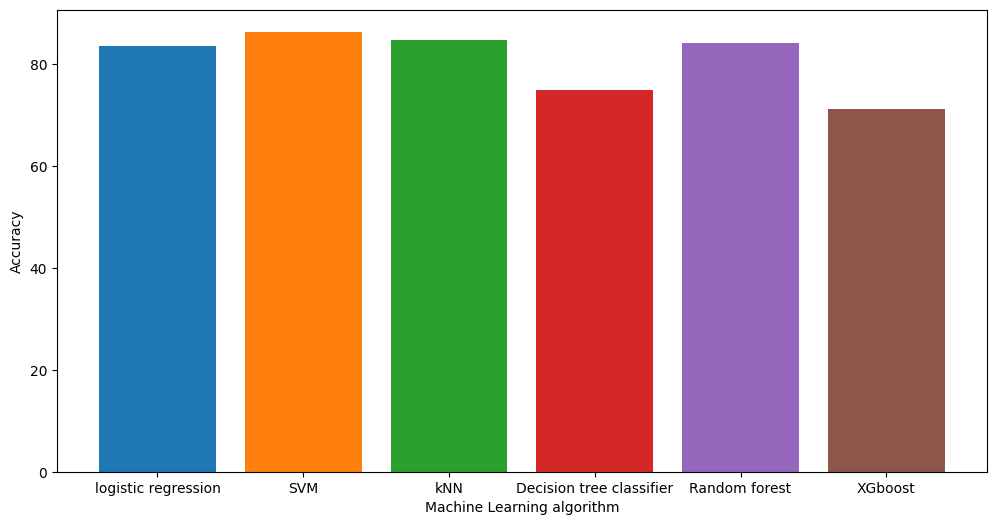

In [47]:
plt.figure(figsize =(12,6) )    #12- length and 6 - width
plt.bar ('logistic regression',logistic_acc)
plt.bar ('SVM',svm_acc)
plt.bar ('kNN',kneighbors_acc)
plt.bar ('Decision tree classifier',decision_tree_acc)
plt.bar ('Random forest',random_forest_acc)
plt.bar ('XGboost',xgboost_acc)


plt.xlabel('Machine Learning algorithm')
plt.ylabel('Accuracy')

In [54]:
# single prediction for new data not in the test data
# Age = 50,sex =0(F),chestpain=0(ASY),RestingBP=105,cholestrol=250,FastingBS=1,RestingECG=(ST)2,MaxHR=175,ExerciseAngina=1 (Y),oldpeak=l.9,ST_Slope=(Down)0


# here we are predicting the new data using svm(more accuracy)
# 1. feature scaling -> convert the data into the range of trained data as mean=0 and std=1
# x_newtest = [[50,0,0,105,250,1,2,175,1,1.9,0]] -> true-> having the heart disease
# 45,0,0,130,237,0,0,170,0,0,0 -> not having the heart disease 
# x_newtest=sc.transform (x_newtest)    #we have to use the same standardscaler object as we used for training the data
# print(x_newtest)


result_y_newtest_pred = model_svm.predict(sc.transform( [[50,0,0,105,250,1,2,175,1,1.9,0]]))
print(result_y_newtest_pred)

print(sc.transform( [[50,0,0,105,250,1,2,175,1,1.9,0]]))
if result_y_newtest_pred == 1:
  print("patient is having a heart disease")
else:
  print("patient is not having any heart disease ")

[1]
[[-0.30901863 -1.96012889 -0.77912558 -1.43531446  0.44258236  1.55158223
   1.64529137  1.5226025   1.27615494  0.91657307 -2.29793389]]
patient is having a heart disease


In [49]:
import pickle

# Assuming `model` is your trained model (e.g., model_logistic, model_svm, etc.)
with open('model.pkl', 'wb') as file:
    pickle.dump(model_svm, file)


In [ ]:
# streamlit run main.py   -> to start the streamlit website 